<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_describe_categorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.1 MB/s eta 0:00:00


In [2]:
# AIDI1006-describe-categorize.ipynb v.2023
# Sample code 1 - using Computer Vision / CognitiveServices

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

from google.colab import drive
drive.mount('/content/drive')

# Authenticate // Authenticates your credentials and creates a client.
# subscription_key = "PASTE_YOUR_SUBSCRIPTION_KEY_HERE"
# endpoint = "PASTE_YOUR_ENDPOINT_HERE"
subscription_key = "7159977d23c14abe9254b8429040885b"
endpoint = "https://computer-vision-ai1006.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

# Quickstart variables // These variables are shared by several examples
remote_image_url = "https://images.seattletimes.com/wp-content/uploads/2023/06/06012023_TZR_Transonic_Truss-Braced_Wing_Airplane_t.jpg?d=1020x655"
remote_image_url = "https://cdn.motor1.com/images/mgl/pbbL7J/s3/2023-ferrari-purosangue.jpg"
local_image_path = "/content/drive/My Drive/images/kim.jpg"
local_image_path = "/content/drive/My Drive/images/people.jpg"

print("===== Describe an Image - local =====")
# Open local image file
local_image = open(local_image_path, "rb")

# Call API
description_result = computervision_client.describe_image_in_stream(local_image)

# Get the captions (descriptions) from the response, with confidence level
print("Description of local image: ")
if (len(description_result.captions) == 0):
    print("No description detected.")
else:
    for caption in description_result.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))
print()
'''
END - Describe an Image - local
'''

'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url )

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))
# </snippet_describe>
print()
'''
END - Describe an Image - remote
'''

'''
Categorize an Image -  local
This example extracts categories from a local image with a confidence score
'''
print("===== Categorize an Image - local =====")
# Open local image file
local_image = open(local_image_path, "rb")
# Select visual feature type(s)
local_image_features = ["categories"]
# Call API
categorize_results_local = computervision_client.analyze_image_in_stream(local_image, local_image_features)

# Print category results with confidence score
print("Categories from local image: ")
if (len(categorize_results_local.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_local.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))
print()
'''
END - Categorize an Image - local
'''

# <snippet_categorize>
'''
Categorize an Image - remote
This example extracts (general) categories from a remote image with a confidence score.
'''
print("===== Categorize an image - remote =====")
# Select the visual feature(s) you want.
remote_image_features = ["categories"]
# Call API with URL and features
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

# Print results with confidence score
print("Categories from remote image: ")
if (len(categorize_results_remote.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_remote.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))
# </snippet_categorize>
print()


Mounted at /content/drive
===== Describe an Image - local =====
Description of local image: 
'a group of people posing for a photo' with confidence 70.30%

===== Describe an image - remote =====
Description of remote image: 
'a silver sports car' with confidence 50.03%

===== Categorize an Image - local =====
Categories from local image: 
'people_group' with confidence 78.52%

===== Categorize an image - remote =====
Categories from remote image: 
'trans_car' with confidence 99.61%



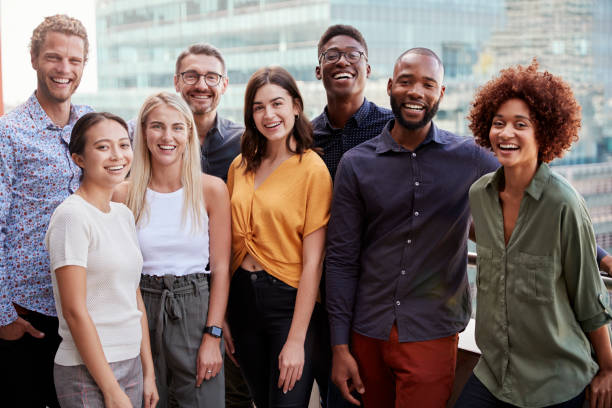

In [3]:
# Read the image stored in the Google Drive // Local image file
from google.colab.patches import cv2_imshow
import cv2 as cv
img = cv.imread(local_image_path)
cv2_imshow(img)

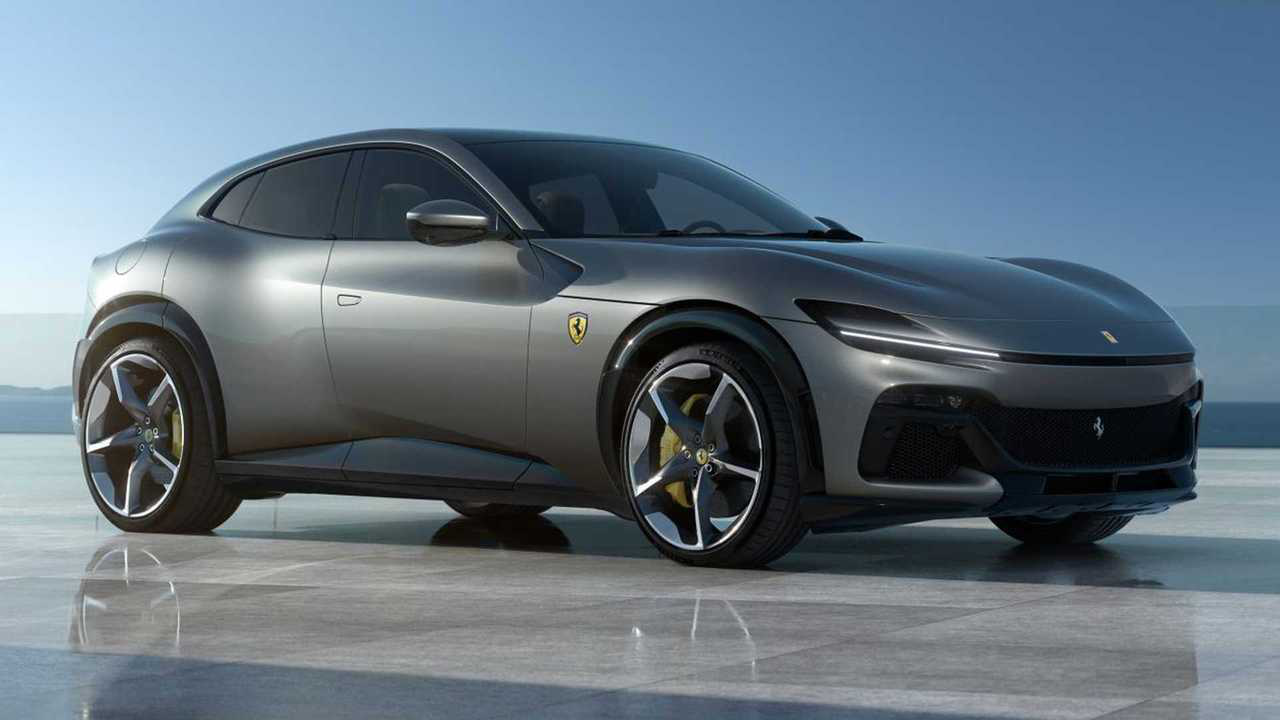

In [4]:
# Read the image URL and print the image file (URL) // Remote image
from PIL import Image
import requests
img = Image.open(requests.get(remote_image_url, stream=True).raw)
img